In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
%matplotlib inline  
import emcee
import math
import matplotlib
from pylab import *
import matplotlib.patheffects as PathEffects
hfont = {'fontname':'Times New roman'}


N0 = pow(10.0, 13.64)


mpl.rcParams['legend.numpoints'] = 1



In [13]:

#
# z < 5.19
x1 = np.array([pow(10.0, 12.6250), pow(10.0, 12.8750), 
               pow(10.0, 13.1250), 
               pow(10.0, 13.3750), pow(10.0, 13.6250), 
               pow(10.0, 13.8750), pow(10.0, 14.1250), 
               pow(10.0, 14.3750), pow(10.0, 14.6250)])


xbound_low1 = np.array([pow(10.0, 12.6250-0.125),
                       pow(10.0, 12.8750-0.125), pow(10.0, 13.1250-0.125), 
                       pow(10.0, 13.3750-0.125), pow(10.0, 13.6250-0.125), 
                       pow(10.0, 13.8750-0.125), pow(10.0, 14.1250-0.125), 
                       pow(10.0, 14.3750-0.125), pow(10.0, 14.6250-0.125)])

xbound_high1 = np.array([pow(10.0, 12.6250+0.125),
                       pow(10.0, 12.8750 + 0.125), pow(10.0, 13.1250 + 0.125), 
                       pow(10.0, 13.3750 + 0.125), pow(10.0, 13.6250 + 0.125), 
                       pow(10.0, 13.8750 + 0.125), pow(10.0, 14.1250 + 0.125), 
                       pow(10.0, 14.3750 + 0.125), pow(10.0, 14.6250 + 0.125)])




dx_c4_z1 =  12.368045564

y1 = np.array([2.02743639327e-12,
                1.55460083906e-12,
                1.32220453119e-12,
                7.45778487022e-13,
                8.75561830867e-14,
                1.19797303791e-13,
                2.6639387537e-14 ,
                7.4902142449e-15 ,
                4.210088676e-15  ])/dx_c4_z1
yerr1 = np.array([9.0762374339e-13 ,
                  5.95993712842e-13,
                  4.12174908375e-13,
                  2.32133144902e-13,
                  5.964521932e-14,
                  5.23185562982e-14,
                  1.85009635448e-14,
                  7.35663738057e-15,
                  4.13597448748e-15])/dx_c4_z1




###################################################
#
# z >= 5.19
x2 = np.array([pow(10.0, 12.8750),
               pow(10.0, 13.1250), pow(10.0, 13.3750), 
               pow(10.0, 13.6250), pow(10.0, 13.8750)])



xbound_low2 = np.array([pow(10.0, 12.8750 - 0.125), pow(10.0, 13.1250-0.125), 
                        pow(10.0, 13.3750-0.125), pow(10.0, 13.6250-0.125), 
                        pow(10.0, 13.8750-0.125)])

xbound_high2 = np.array([pow(10.0, 12.8750 + 0.125), pow(10.0, 13.1250 + 0.125), 
                         pow(10.0, 13.3750 + 0.125), pow(10.0, 13.6250 + 0.125), 
                         pow(10.0, 13.8750 + 0.125)])



y2 = np.array([4.19963e-14, 2.55262e-14, 
      3.16200e-15, 3.55624e-15])


dx_c4_z2 =  14.4195335701

y2 = np.array([7.27133325487e-13,
6.25122221715e-13,
3.58235012593e-13,
6.02253728009e-14,
1.54976340345e-14])/dx_c4_z2


yerr2 = np.array([4.07604766703e-13,
2.83409692056e-13,
1.60885255473e-13,
4.9467729578e-14,
1.41112319345e-14])/dx_c4_z2



In [14]:
xfit = np.array([pow(10.0, 12.0), pow(10.0, 16.6250)])

x1fit = np.array([pow(10.0, 12.75), pow(10.0, 12.8750), 
               pow(10.0, 13.1250), 
               pow(10.0, 13.3750), pow(10.0, 13.6250), 
               pow(10.0, 13.8750), pow(10.0, 14.1250), 
               pow(10.0, 14.3750), pow(10.0, 14.6250),pow(10.0, 17.6250)])

x2fit = np.array([pow(10.0, 13.0),
               pow(10.0, 13.1250), pow(10.0, 13.3750), 
               pow(10.0, 13.6250), pow(10.0, 13.8750), 
               pow(10.0, 14.1250), pow(10.0, 14.3750),
               pow(10.0, 14.6250), pow(10.0, 17.6250)])

###################################################
alpha1 = -1.32
alpha_error1 = 0.1
logB1 = -13.952301 
logb_error1 = 0.08



fit_values1 = pow(10.0, logB1)*pow(x1fit/N0, alpha1)
fit_values_low1 = pow(10.0, logB1 - logb_error1)*pow(x1fit/N0, alpha1-alpha_error1)
fit_values_high1 = pow(10.0, logB1 + logb_error1)*pow(x1fit/N0, alpha1+alpha_error1)
###################################################
###################################################
alpha2 = -1.96
alpha_error2 = 0.36
logB2 =  -14.328951
logb_error2 = 0.18


fit_values2 = pow(10.0, logB2)*pow(x2fit/N0, alpha2)
fit_values_low2 = pow(10.0, logB2 - logb_error2)*pow(x2fit/N0, alpha2-alpha_error2)
fit_values_high2 = pow(10.0, logB2 + logb_error2)*pow(x2fit/N0, alpha2+alpha_error2)
###################################################


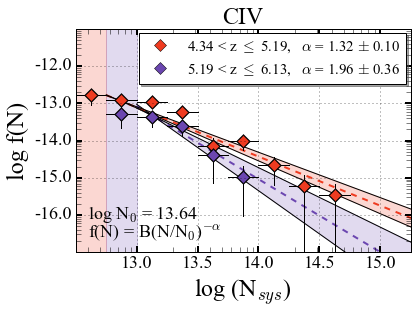

In [15]:
# x and y ranges and scale
plt.xlim([pow(10.0, 12.5),pow(10, 15.25)])
plt.ylim([pow(10.0, -17.0), pow(10, -11.0)] )
plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '13.5', '14.0', '14.5', '15.0']
plt.xticks([pow(10.0, 13.0), pow(10.0, 13.5), 
            pow(10.0, 14.0), pow(10.0, 14.5), pow(10.0, 15.0)], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-12.0', '-13.0', '-14.0', '-15.0', '-16.0']
plt.yticks([pow(10.0, -12.0), pow(10.0, -13.0), 
            pow(10.0, -14.0), pow(10.0, -15.0), 
            pow(10.0, -16.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
z1color = [240.0/256.0, 59.0/256.0, 32.0/256.0] 
fullzcolor = [107/256.0, 70/256.0, 177/256.0] 
z2color = [252/256.0, 146/256.0, 114/256.0]  

# plot the best fit filled area
plt.plot(x2fit, fit_values2, '--', lw=2.0, color = fullzcolor)
plt.plot(x2fit, fit_values_low2, 'k-', lw=1.0)
plt.plot(x2fit, fit_values_high2, 'k-', lw=1.0)
plt.fill_between(x2fit, fit_values_high2, fit_values_low2, color = fullzcolor, alpha = 0.2)

plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)


# plot the error_bars
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
for i in range(0, len(x2)):
    plt.plot([x2[i], x2[i]], [y2[i] - yerr2[i], y2[i] + yerr2[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)

for i in range(0, len(x2)):
    plt.plot([xbound_low2[i], xbound_high2[i]], [y2[i], y2[i]], 'k-', lw=1.0)    

# plot the exclusion boxes
plt.fill_between([pow(10.0, 12.75), pow(10.0, 12.30)], 
                 [0, 0], 
                 [1, 1], 
                 color = z1color, alpha = 0.2)
plt.fill_between([pow(10.0, 12.75), pow(10.0, 13.0)], 
                 [0, 0], 
                 [1, 1], 
                 color = fullzcolor, alpha = 0.2)



# plot the data
plt.plot(x1, y1, 'kD', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'D', markersize=8, alpha=1.0, color = z1color, 
         label = "4.34 < z $\leq$ 5.19,   $\\alpha$ = 1.32 $\pm$ 0.10")  

plt.plot(x2, y2, 'kD', markersize=10, alpha=1.0)  
plt.plot(x2, y2,  'D', markersize=8, alpha=1.0, color = fullzcolor, 
         label = "5.19 < z $\leq$ 6.13,   $\\alpha$ = 1.96 $\pm$ 0.36")  


# x, y labels and title
plt.xlabel('log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)

plt.title('CIV', **hfont,  fontsize=24)


plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)


# add legend
txt2 = plt.text(pow(10.0, 12.6), pow(10.0, -16.6), 
                 "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=18, color = 'k')
txt1 = plt.text(pow(10.0, 12.6), pow(10.0, -16.1), 
                "log N$_{0}$ = 13.64",
                **hfont,  fontsize=18, color = 'k')


plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'c4cddf.png'

plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)




In [26]:
x1 = np.array([ 12.6250, 12.8750, 13.1250, 13.3750, 13.6250, 13.8750, 14.1250, 14.3750, 14.6250])
xbound_low1  = np.array(x1 - 0.125)
xbound_high1 = np.array(x1 + 0.125)

x2 = np.array([ 12.8750, 13.1250, 13.3750, 13.6250, 13.8750])
xbound_low2  = np.array(x2 - 0.125)
xbound_high2 = np.array(x2 + 0.125)

xfit = np.array([ 12.0, 16.6250])
x1fit = np.array([ 12.75, 12.8750, 13.1250, 13.3750, 13.6250, 13.8750, 14.1250, 14.3750, 14.6250, 17.6250])
x2fit = np.array([ 13.0, 13.1250, 13.3750, 13.6250, 13.8750, 14.1250, 14.3750, 14.6250, 17.6250])


In [27]:
x2 = np.array([ 12.8750, 13.1250, 13.3750, 13.6250, 13.8750])
xbound_low2


array([ 12.75,  13.  ,  13.25,  13.5 ,  13.75])

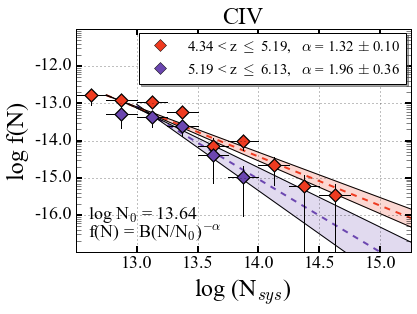

In [28]:
# x and y ranges and scale
plt.xlim([ 12.5 , 15.25])
plt.ylim([pow(10.0, -17.0), pow(10, -11.0)] )
#plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '13.5', '14.0', '14.5', '15.0']
plt.xticks([ 13.0, 13.5, 14.0, 14.5, 15.0], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-12.0', '-13.0', '-14.0', '-15.0', '-16.0']
plt.yticks([pow(10.0, -12.0), pow(10.0, -13.0), 
            pow(10.0, -14.0), pow(10.0, -15.0), 
            pow(10.0, -16.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
z1color = [240.0/256.0, 59.0/256.0, 32.0/256.0] 
fullzcolor = [107/256.0, 70/256.0, 177/256.0] 
z2color = [252/256.0, 146/256.0, 114/256.0]  

# plot the best fit filled area
plt.plot(x2fit, fit_values2, '--', lw=2.0, color = fullzcolor)
plt.plot(x2fit, fit_values_low2, 'k-', lw=1.0)
plt.plot(x2fit, fit_values_high2, 'k-', lw=1.0)
plt.fill_between(x2fit, fit_values_high2, fit_values_low2, color = fullzcolor, alpha = 0.2)

plt.plot(x1fit, fit_values1, '--', lw=2.0, color = z1color)
plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)


# plot the error_bars
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
for i in range(0, len(x2)):
    plt.plot([x2[i], x2[i]], [y2[i] - yerr2[i], y2[i] + yerr2[i]], 'k-', lw=1.0)


# plot the x boundaries
for i in range(0, len(x1)):
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)

for i in range(0, len(x2)):
    plt.plot([xbound_low2[i], xbound_high2[i]], [y2[i], y2[i]], 'k-', lw=1.0)    

# plot the exclusion boxes
plt.fill_between([pow(10.0, 12.75), pow(10.0, 12.30)], 
                 [0, 0], 
                 [1, 1], 
                 color = z1color, alpha = 0.2)
plt.fill_between([pow(10.0, 12.75), pow(10.0, 13.0)], 
                 [0, 0], 
                 [1, 1], 
                 color = fullzcolor, alpha = 0.2)



# plot the data
plt.plot(x1, y1, 'kD', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'D', markersize=8, alpha=1.0, color = z1color, 
         label = "4.34 < z $\leq$ 5.19,   $\\alpha$ = 1.32 $\pm$ 0.10")  

plt.plot(x2, y2, 'kD', markersize=10, alpha=1.0)  
plt.plot(x2, y2,  'D', markersize=8, alpha=1.0, color = fullzcolor, 
         label = "5.19 < z $\leq$ 6.13,   $\\alpha$ = 1.96 $\pm$ 0.36")  


# x, y labels and title
plt.xlabel('log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)

plt.title('CIV', **hfont,  fontsize=24)


plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)


# add legend
txt2 = plt.text(12.6, pow(10.0, -16.6), 
                 "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=18, color = 'k')
txt1 = plt.text(12.6, pow(10.0, -16.1), 
                "log N$_{0}$ = 13.64",
                **hfont,  fontsize=18, color = 'k')


plt.rc('legend',**{'fontsize':15})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.99, 0.99), loc=1, borderaxespad=0.1, shadow=True)


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'c4cddf.png'

plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)





# Compare to DODORICO2014


In [5]:
###################################################
#
# z < 5.19
x1 = np.array([pow(10.0, 12.6250), pow(10.0, 12.8750), 
               pow(10.0, 13.1250), 
               pow(10.0, 13.3750), pow(10.0, 13.6250), 
               pow(10.0, 13.8750), pow(10.0, 14.1250), 
               pow(10.0, 14.3750), pow(10.0, 14.6250)])

xbound_low1 = np.array([pow(10.0, 12.6250-0.125),
                       pow(10.0, 12.8750-0.125), pow(10.0, 13.1250-0.125), 
                       pow(10.0, 13.3750-0.125), pow(10.0, 13.6250-0.125), 
                       pow(10.0, 13.8750-0.125), pow(10.0, 14.1250-0.125), 
                       pow(10.0, 14.3750-0.125), pow(10.0, 14.6250-0.125)])

xbound_high1 = np.array([pow(10.0, 12.6250+0.125),
                       pow(10.0, 12.8750 + 0.125), pow(10.0, 13.1250 + 0.125), 
                       pow(10.0, 13.3750 + 0.125), pow(10.0, 13.6250 + 0.125), 
                       pow(10.0, 13.8750 + 0.125), pow(10.0, 14.1250 + 0.125), 
                       pow(10.0, 14.3750 + 0.125), pow(10.0, 14.6250 + 0.125)])




dx_c4_z1 =  14.3402319031

y1 = np.array([2.02743639327e-12,
               1.55460083906e-12,
               1.32220453119e-12,
               7.45778487022e-13,
               8.75561830867e-14,
               1.19797303791e-13,
               2.6639387537e-14 ,
               7.4902142449e-15 ,
               4.210088676e-15  ])/dx_c4_z1



yerr1 = np.array([9.0762374339e-13,
                  5.95993712842e-13,
                  4.12174908375e-13,
                  2.32133144902e-13,
                  5.964521932e-14,
                  5.23185562982e-14,
                  1.85009635448e-14,
                  7.35663738057e-15,
                  4.13597448748e-15])/dx_c4_z1



In [34]:
x1fit = np.array([pow(10.0, 12.5), pow(10.0, 16.6250)])

###################################################
# fit parameters
# 25.5200      5.00000      4.00000      6.2000
###################################################
###################################################
# fit parameters
# 12.6700      5.00000      4.00000      5.19000c4
#

alpha1 = -1.29
alpha_error1 = 0.08
logB1 = -13.976556 
logb_error1 = 0.07
N0 = pow(10.0, 13.64)

fit_values1 = pow(10.0, logB1)*pow(x1fit/N0, alpha1)
fit_values_low1 = pow(10.0, logB1 - logb_error1)*pow(x1fit/N0, alpha1-alpha_error1)
fit_values_high1 = pow(10.0, logB1 + logb_error1)*pow(x1fit/N0, alpha1+alpha_error1)
###################################################
###################################################
# fit parameters
# 12.8500       5.00000      5.19000      6.20000c4
#
x2fit = np.array([pow(10.0, 13.0), pow(10.0, 16.6250)])


alpha2 = -1.93
alpha_error2 = 0.18
logB2 = -13.806556
logb_error2 = 0.08
N0 = pow(10.0, 13.64)

fit_values2 = pow(10.0, logB2)*pow(x2fit/N0, alpha2)
fit_values_low2 = pow(10.0, logB2 - logb_error2)*pow(x2fit/N0, alpha2-alpha_error2)
fit_values_high2 = pow(10.0, logB2 + logb_error2)*pow(x2fit/N0, alpha2+alpha_error2)
###################################################


###################################################
###################################################
# fit parameters
# 12.8500       5.00000      5.19000      6.20000c4
#
x3fit = np.array([pow(10.0, 12.75), pow(10.0, 16.6250)])


alpha3 = -1.35
alpha_error3 = 0.10
logB3 = -13.966556
logb_error3 = 0.08

fit_values3 = pow(10.0, logB3)*pow(x3fit/N0, alpha3)
fit_values_low3 = pow(10.0, logB3 - logb_error3)*pow(x3fit/N0, alpha3-alpha_error3)
fit_values_high3 = pow(10.0, logB3 + logb_error3)*pow(x3fit/N0, alpha3+alpha_error3)
###################################################



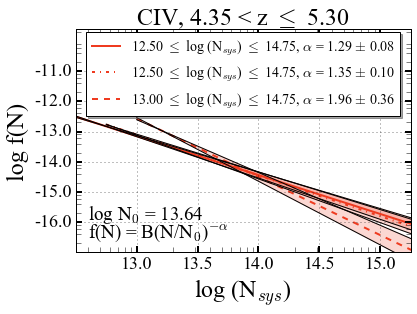

In [35]:
# x and y ranges and scale
plt.xlim([pow(10.0, 12.5),pow(10, 15.25)])
plt.ylim([pow(10.0, -17.0), pow(10, -9.6)] )
plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '13.5', '14.0', '14.5', '15.0']
plt.xticks([pow(10.0, 13.0), pow(10.0, 13.5), 
            pow(10.0, 14.0), pow(10.0, 14.5), pow(10.0, 15.0)], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-11.0', '-12.0', '-13.0', '-14.0', '-15.0', '-16.0']
plt.yticks([pow(10.0, -11.0),
            pow(10.0, -12.0), pow(10.0, -13.0), 
            pow(10.0, -14.0), pow(10.0, -15.0), 
            pow(10.0, -16.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
z1color = [240.0/256.0, 59.0/256.0, 32.0/256.0] 
fullzcolor = [107/256.0, 70/256.0, 177/256.0] 
z2color = [252/256.0, 146/256.0, 114/256.0]  

# plot the best fit filled area
plt.plot(x1fit, fit_values1, '-', lw=2.0, color = z1color, 
         label = "12.50 $\leq$ log (N$_{sys}$) $\leq$ 14.75, $\\alpha$ = 1.29 $\pm$ 0.08")  
plt.plot(x3fit, fit_values3, '-.', lw=2.0, color = z1color, 
         label = "12.50 $\leq$ log (N$_{sys}$) $\leq$ 14.75, $\\alpha$ = 1.35 $\pm$ 0.10")  
plt.plot(x2fit, fit_values2, '--', lw=2.0, color = z1color, 
         label = "13.00 $\leq$ log (N$_{sys}$) $\leq$ 14.75, $\\alpha$ = 1.96 $\pm$ 0.36") 


plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)

plt.plot(x2fit, fit_values_low2, 'k-', lw=1.0)
plt.plot(x2fit, fit_values_high2, 'k-', lw=1.0)
plt.fill_between(x2fit, fit_values_high2, fit_values_low2, color = z1color, alpha = 0.2)

plt.plot(x3fit, fit_values_low3, 'k-', lw=1.0)
plt.plot(x3fit, fit_values_high3, 'k-', lw=1.0)
plt.fill_between(x3fit, fit_values_high3, fit_values_low3, color = z1color, alpha = 0.2)

# plot the error_bars
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)

# plot the data
plt.plot(x1, y1, 'kD', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'D', markersize=8, alpha=1.0, color = z1color)   

# x, y labels and title
plt.xlabel('log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)

plt.title('CIV, 4.35 < z $\leq$ 5.30', **hfont,  fontsize=24)


# add legend
plt.rc('legend',**{'fontsize':14.})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.5, 1.11), loc=9, borderaxespad=2, shadow=True)


txt3 = plt.text(pow(10.0, 12.6), pow(10.0, -16.5), 
                "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')

txt4 = plt.text(pow(10.0, 12.6), pow(10.0, -15.9), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'c4D14cddf.png'

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)


plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)






In [36]:
x1fit, fit_values_low1

(array([  3.16227766e+12,   4.21696503e+16]),
 array([  3.27524657e-13,   7.31128982e-19]))

In [37]:
x1 = np.array([ 12.6250,  12.8750, 13.1250, 13.3750,  13.6250, 13.8750,  14.1250, 14.3750, 14.6250])

xbound_low1 = np.array(x1 - 0.125)
xbound_high1 = np.array(x1 + 0.125)

x1fit = np.array([ 12.5,  16.6250])
x2fit = np.array([ 13.0,  16.6250])
x3fit = np.array([ 12.75,  16.6250])



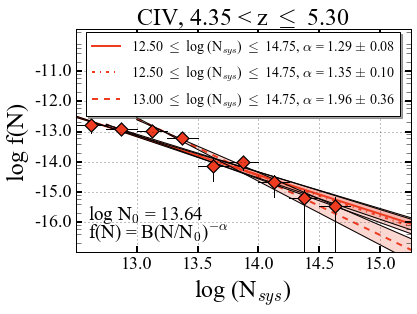

In [38]:
# x and y ranges and scale
plt.xlim([12.5, 15.25])
plt.ylim([pow(10.0, -17.0), pow(10, -9.6)] )
#plt.xscale('log')
plt.yscale('log')

# x and y ticks
xlabels = ['13.0', '13.5', '14.0', '14.5', '15.0']
plt.xticks([13.0, 13.5, 14.0, 14.5, 15.0], 
            xlabels, **hfont, fontsize = 18)
ylabels = ['-11.0', '-12.0', '-13.0', '-14.0', '-15.0', '-16.0']
plt.yticks([pow(10.0, -11.0),
            pow(10.0, -12.0), pow(10.0, -13.0), 
            pow(10.0, -14.0), pow(10.0, -15.0), 
            pow(10.0, -16.0)], 
            ylabels, **hfont, fontsize = 18)

plt.grid(True)

# define the colors
z1color = [240.0/256.0, 59.0/256.0, 32.0/256.0] 
fullzcolor = [107/256.0, 70/256.0, 177/256.0] 
z2color = [252/256.0, 146/256.0, 114/256.0]  

# plot the best fit filled area
plt.plot(x1fit, fit_values1, '-', lw=2.0, color = z1color, 
         label = "12.50 $\leq$ log (N$_{sys}$) $\leq$ 14.75, $\\alpha$ = 1.29 $\pm$ 0.08")  
plt.plot(x3fit, fit_values3, '-.', lw=2.0, color = z1color, 
         label = "12.50 $\leq$ log (N$_{sys}$) $\leq$ 14.75, $\\alpha$ = 1.35 $\pm$ 0.10")  
plt.plot(x2fit, fit_values2, '--', lw=2.0, color = z1color, 
         label = "13.00 $\leq$ log (N$_{sys}$) $\leq$ 14.75, $\\alpha$ = 1.96 $\pm$ 0.36") 


plt.plot(x1fit, fit_values_low1, 'k-', lw=1.0)
plt.plot(x1fit, fit_values_high1, 'k-', lw=1.0)
plt.fill_between(x1fit, fit_values_high1, fit_values_low1, color = z1color, alpha = 0.2)

plt.plot(x2fit, fit_values_low2, 'k-', lw=1.0)
plt.plot(x2fit, fit_values_high2, 'k-', lw=1.0)
plt.fill_between(x2fit, fit_values_high2, fit_values_low2, color = z1color, alpha = 0.2)

plt.plot(x3fit, fit_values_low3, 'k-', lw=1.0)
plt.plot(x3fit, fit_values_high3, 'k-', lw=1.0)
plt.fill_between(x3fit, fit_values_high3, fit_values_low3, color = z1color, alpha = 0.2)

# plot the error_bars
for i in range(0, len(x1)):
    plt.plot([x1[i], x1[i]], [y1[i] - yerr1[i], y1[i] + yerr1[i]], 'k-', lw=1.0)
    plt.plot([xbound_low1[i], xbound_high1[i]], [y1[i], y1[i]], 'k-', lw=1.0)

# plot the data
plt.plot(x1, y1, 'kD', markersize=10, alpha=1.0)  
plt.plot(x1, y1, 'D', markersize=8, alpha=1.0, color = z1color)   

# x, y labels and title
plt.xlabel('log (N$_{sys}$)', **hfont,  fontsize=24)
plt.ylabel('log f(N)', **hfont,  fontsize=24)

plt.title('CIV, 4.35 < z $\leq$ 5.30', **hfont,  fontsize=24)


# add legend
plt.rc('legend',**{'fontsize':14.})
plt.rc('font',family='Times New Roman')
plt.legend(bbox_to_anchor=(0.5, 1.11), loc=9, borderaxespad=2, shadow=True)


txt3 = plt.text(12.6, pow(10.0, -16.5), 
                "f(N) = B(N/N$_{0}$)$^{-\\alpha}$", 
                **hfont,  fontsize=19, color = 'k')

txt4 = plt.text(12.6, pow(10.0, -15.9), 
                "log N$_{0}$ = 13.64", 
                **hfont,  fontsize=19, color = 'k')


plot_path = '/Users/alex/Desktop/final_files/correct_precision/paper2/cddfs/plots/'
plot_name = plot_path + 'c4D14cddf.png'

plt.tick_params(direction='in', length=6, width=2)
plt.tick_params(which='minor', length=5)


plt.savefig(plot_name, bbox_inches='tight', figsize=[12,9], dpi=500)







In [39]:
x1fit, fit_values_low1

(array([ 12.5  ,  16.625]), array([  3.27524657e-13,   7.31128982e-19]))